In [62]:
import pandas as pd
ch = pd.read_csv('./data/food_establishment_inspections.csv', engine='python')
cleaned_data = ch.drop_duplicates(['facility', 'address', 'inspection_date'])

In [63]:
inspection_counts_prelim = cleaned_data.groupby(["address", "facility"])

In [64]:
inspection_counts = inspection_counts_prelim.size()

In [65]:
inspection_counts[:20]

address                                       facility                            
"B" CLUSTER,  GARDEN CITY                     CLUSTER B MARKETCAFE @ NCC               1
#1 CHURCH STREET,  HYDE PARK                  MEALS ON WHEELS-HYDE PARK               25
#1 OSCAWANA LAKE  ROAD,  PUTNAM VALLEY        WATSON'S RESTAURANT & BAR                2
#2-20 RENSSELAER STREET,  ALBANY              WE DO FONDUE (MEALS ON WHEELS)           8
#309 CLIFTON PARK CENTER ROAD,  CLIFTON PARK  STARBUCK'S COFFEE #7664                  1
#36 AVENUE M,  MECHANICVILLE                  MALTA GARDENS SUMMER FEEDING PROGRAM     1
#5 43 MALL,  W. SAND LAKE                     CROSSROADS AMERICAN GRILLE               4
#C202 - 1 CROSSGATES MALL ROAD,  ALBANY       DUNKIN DONUTS (CROSSGATES)               5
. JONES BEACH STATE PARK,  WANTAGH            JONES BEACH FIELD 6                      3
0369 ROUTES 5 AND 20,  WATERLOO               PATSY'S DRIVE IN                        12
0379  WATERLOO-GENEVA ROAD,

In [67]:
inspection_counts_clean = inspection_counts[inspection_counts != 0]

In [68]:
print(inspection_counts_clean.var())
print(inspection_counts_clean.mean(), inspection_counts_clean.max(), inspection_counts_clean.min())
print(inspection_counts_clean.shape)

66.12561686104641
11.026039455435736 148 1
(35331,)


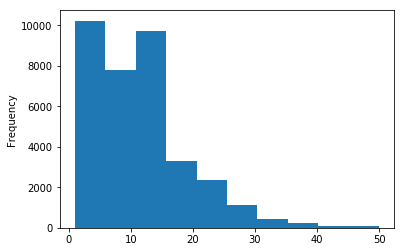

In [69]:
capped_inspections = inspection_counts_clean.apply(lambda x: min(x, 50))
capped_inspections.plot(kind='hist')

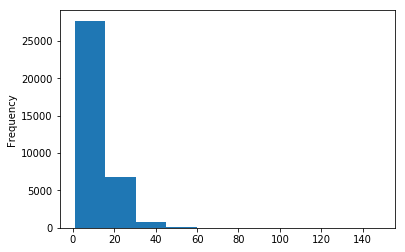

In [70]:
inspection_counts_clean.plot(kind='hist')

In [89]:
precomp = {}

axis_names = inspection_counts_clean.axes[0]

for names, row_data in zip(axis_names, inspection_counts_clean):
    precomp[names] = [0, 0, row_data]

real_names = precomp.keys()

for index, row in cleaned_data.iterrows():
    row_key = (row["address"], row["facility"])
    if row_key in real_names:
        precomp[row_key][0] += row["num_critical"]
        precomp[row_key][1] += row["num_noncritical"]

print("got through the rows")

corr_df = pd.DataFrame(list(precomp.items()))

got through the rows


In [90]:
corr_df.loc[:20]

,0,1
0,"(""B"" CLUSTER, GARDEN CITY, CLUSTER B MARKETCA...","[2.0, 2.0, 1]"
1,"(#1 CHURCH STREET, HYDE PARK, MEALS ON WHEELS...","[nan, nan, 25]"
2,"(#1 OSCAWANA LAKE ROAD, PUTNAM VALLEY, WATSO...","[0.0, 5.0, 2]"
3,"(#2-20 RENSSELAER STREET, ALBANY, WE DO FONDU...","[0.0, 0.0, 8]"
4,"(#309 CLIFTON PARK CENTER ROAD, CLIFTON PARK,...","[0.0, 4.0, 1]"
5,"(#36 AVENUE M, MECHANICVILLE, MALTA GARDENS S...","[0.0, 0.0, 1]"
6,"(#5 43 MALL, W. SAND LAKE, CROSSROADS AMERICA...","[4.0, 8.0, 4]"
7,"(#C202 - 1 CROSSGATES MALL ROAD, ALBANY, DUNK...","[0.0, 3.0, 5]"
8,"(. JONES BEACH STATE PARK, WANTAGH, JONES BEA...","[3.0, 6.0, 3]"
9,"(0369 ROUTES 5 AND 20, WATERLOO, PATSY'S DRIV...","[nan, nan, 12]"
